# Exploratory Data Analysis on Pokemon data
![Random Unsplash Image](https://i.ibb.co/yPwYbf9/pokemon.jpg)

Pokemon,Also Known as Pocket monsters is a japanese media franchise which needs no introduction as It had a huge part in most of our childhoods.It began as an anime but then moved on to Videogames by Nintendo Gameboy and then proceeded to modernise like every other videogame franchise.Even though,Most of us still associate Pokemon with the TV show and the trading cards which was a hit till 2005s.
This course project is an Exploratory Data analysis on Pokemon games and the given stats and enumeration for each pokemon in game which includes their Type,Attack power,Speed, Defense etc. This will be fun considering there are around 800 pokemons with different types of powers.So,We will proceed to determine which Pokemons are good at which type of skills.
Even though,This might not have any real world usage other than a greater insight and trivia about the pokemons in the fandom and in the Pokemon nerd demographic.But,Still a brilliant dataset nonetheless to practise Exploratory data analysis.

#### Importing all the necessary libraries

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import jovian
%matplotlib inline

In [ ]:
project_name = "Pokemon Data Analysis"

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

We will start with uploading the data and then we will clean the data according to our requirements.



In [ ]:
poke_df = pd.read_csv("Pokemon_Data.csv")
poke_df.head()

Sr.no                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1              Bulbasaur  Grass  Poison  45      49       49       65   
1      2                Ivysaur  Grass  Poison  60      62       63       80   
2      3               Venusaur  Grass  Poison  80      82       83      100   
3      3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4      4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [ ]:
poke_df.shape # gives us number of rows and columns in dataframe.

(800, 12)

We can see that we have the required data with us to work on. It displays various columns,one thing to note here is the column named Sr.no is not index number but it is the pokedex number given to the pokemon, so in the data the Pokemon shares same pokedex number with its evolved version.In Other words we can say that,Pokedex number works like a primary key for a certain type of pokemon so It doesn't matter the level of it's evolution,We will still have the same Pokedex number to identify it.


We will start by renaming the column using `.rename()`method.

In [ ]:
poke_df.rename(columns = {"Sr.no":"Pokedex_no."},inplace = True) #We have to pass a dictonary in the function.

In [ ]:
poke_df.head()

Pokedex_no.                   Name Type 1  Type 2  HP  Attack  Defense  \
0            1              Bulbasaur  Grass  Poison  45      49       49   
1            2                Ivysaur  Grass  Poison  60      62       63   
2            3               Venusaur  Grass  Poison  80      82       83   
3            3  VenusaurMega Venusaur  Grass  Poison  80     100      123   
4            4             Charmander   Fire     NaN  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

Here we got our required change using`.head()` we got only first five rows of our data.Pokemons have Type 1 and Type 2 which are their Primary and secondary elements but on fifth place we see Pokemon named Charmander has NaN in Type 2  column which means it doesnt have any secondary element power and there are many other Pokemons with no Type 2, So we will use `.fillna()` method to fill all NaN values with 0.

In [ ]:
poke_df.isnull().sum() #using isnull().sum() we get number of null or NaN values in Dataframe.

Pokedex_no.      0
Name             0
Type 1           0
Type 2         386
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

In [ ]:
#we will replace Nan with 0".
poke_df["Type 2"].fillna("0", inplace=True)

In [ ]:
#Lets check->
poke_df["Type 2"].isnull().sum()

0

Now let us add a column where we get a Total where we add up the given stats for each pokemon.
we will use `.iloc[]` method. This is used when the index label of a data frame is something other than numeric series of 0, 1, 2, 3….n-1,n or in case the user doesn’t know the index label. Here we will add up columns of HP,Attack,Defense,Sp. Atk,
Sp. Def and Speed.

In [ ]:
poke_df["Total"]=poke_df.iloc[:,4:10].sum(axis=1)

In [ ]:
poke_df.head()

Pokedex_no.                   Name Type 1  Type 2  HP  Attack  Defense  \
0            1              Bulbasaur  Grass  Poison  45      49       49   
1            2                Ivysaur  Grass  Poison  60      62       63   
2            3               Venusaur  Grass  Poison  80      82       83   
3            3  VenusaurMega Venusaur  Grass  Poison  80     100      123   
4            4             Charmander   Fire       0  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total  
0       65       65     45           1      False    318  
1       80       80     60           1      False    405  
2      100      100     80           1      False    525  
3      122      120     80           1      False    625  
4       60       50     65           1      False    309

In [ ]:
col = list(poke_df.columns) #<- This displays list of columns
col

['Pokedex_no.',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total']

In [ ]:
poke_df=poke_df[col[0:10]+[col[-1]]+col[10:12]]
poke_df.head()

Pokedex_no.                   Name Type 1  Type 2  HP  Attack  Defense  \
0            1              Bulbasaur  Grass  Poison  45      49       49   
1            2                Ivysaur  Grass  Poison  60      62       63   
2            3               Venusaur  Grass  Poison  80      82       83   
3            3  VenusaurMega Venusaur  Grass  Poison  80     100      123   
4            4             Charmander   Fire       0  39      52       43   

   Sp. Atk  Sp. Def  Speed  Total  Generation  Legendary  
0       65       65     45    318           1      False  
1       80       80     60    405           1      False  
2      100      100     80    525           1      False  
3      122      120     80    625           1      False  
4       60       50     65    309           1      False

To move the index we used indexing method where we repositoned last row which takes -1 as index between first nine and last two columns.

In [ ]:
poke_df.shape #now when we check the shape we get additional column shown

(800, 13)

Now we will find out the total count of Pokemons in the used dataset

In [ ]:
num= poke_df["Name"].count()
print(f"There are {num} Pokemons in the Dataset.")

There are 800 Pokemons in the Dataset.


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anurag-commando-dude/pokemon-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/anurag-commando-dude/pokemon-data-analysis


'https://jovian.ai/anurag-commando-dude/pokemon-data-analysis'

## Exploratory Analysis and Visualization

Now that we have our data like in a format that we want lets move on to the anaylsis part. This helps us to point out what data really wants to say. 

We start with `.describe()` method - This helps us with descriptive statistics of the dataframe. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [ ]:
poke_df.describe()

Pokedex_no.          HP      Attack     Defense     Sp. Atk  \
count   800.000000  800.000000  800.000000  800.000000  800.000000   
mean    362.813750   69.258750   79.001250   73.842500   72.820000   
std     208.343798   25.534669   32.457366   31.183501   32.722294   
min       1.000000    1.000000    5.000000    5.000000   10.000000   
25%     184.750000   50.000000   55.000000   50.000000   49.750000   
50%     364.500000   65.000000   75.000000   70.000000   65.000000   
75%     539.250000   80.000000  100.000000   90.000000   95.000000   
max     721.000000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed      Total  Generation  
count  800.000000  800.000000  800.00000   800.00000  
mean    71.902500   68.277500  435.10250     3.32375  
std     27.828916   29.060474  119.96304     1.66129  
min     20.000000    5.000000  180.00000     1.00000  
25%     50.000000   45.000000  330.00000     2.00000  
50%     70.000000   65.000000  450.00000     3.00000  
75%     90.000000   90.000000  515.00000     5.00000  
max    230.000000  180.000000  780.00000     6.00000

This showed us descriptive side of dataframe. 
* count - It shows row count of dataframe.
* mean - This shows mean or average of each column.
* st- stands for standard deviation.
* min - gives us the minimum value. (For eg. we see that pokemon with lowest speed has Speed of 5.)
* 25%, 50%, 75% - are percentiles
* max - gives us the maximum value.(For eg. Fastest pokemon has Speed 180. )

To see probable connections between all the columns we can use `sns.pairplot` which will help us visualize data through graphs, histogram, scatterplots etc.

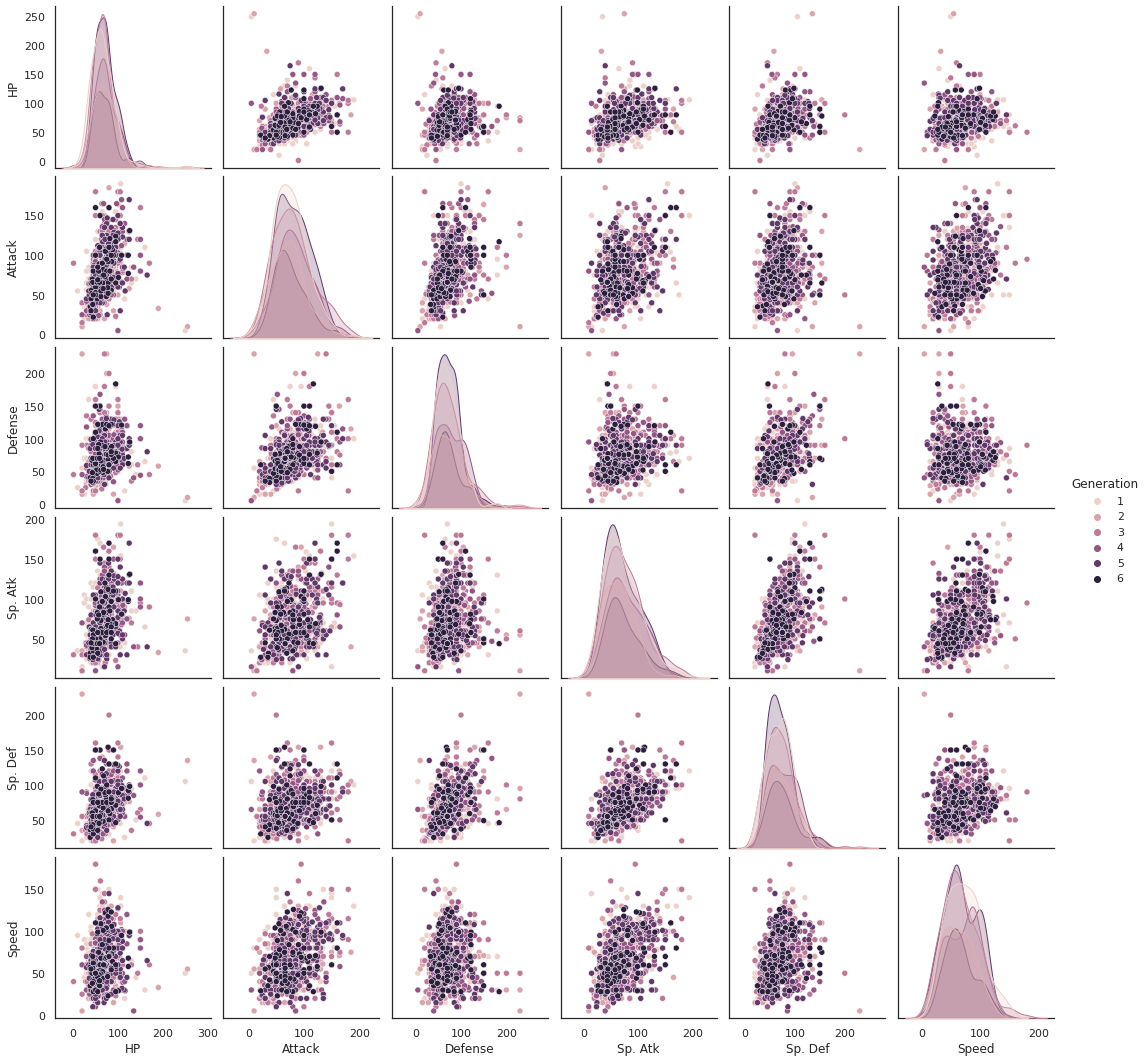

In [ ]:
sns.pairplot(poke_df,vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],hue='Generation')

we used `vars=[]` which helps us to input list of vairable names.We selected only those columns which would give meaning to our plots in pairplots.

Similarly we use `.groupby()`, this helps us to split our data into groups based on some criteria, in this case lets see what is average stats of Type 1 pokemons. 

In [ ]:
poke_df.groupby("Type 1")[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].mean()

HP      Attack     Defense    Sp. Atk    Sp. Def       Speed
Type 1                                                                       
Bug       56.884058   70.971014   70.724638  53.869565  64.797101   61.681159
Dark      66.806452   88.387097   70.225806  74.645161  69.516129   76.161290
Dragon    83.312500  112.125000   86.375000  96.843750  88.843750   83.031250
Electric  59.795455   69.090909   66.295455  90.022727  73.704545   84.500000
Fairy     74.117647   61.529412   65.705882  78.529412  84.705882   48.588235
Fighting  69.851852   96.777778   65.925926  53.111111  64.703704   66.074074
Fire      69.903846   84.769231   67.769231  88.980769  72.211538   74.442308
Flying    70.750000   78.750000   66.250000  94.250000  72.500000  102.500000
Ghost     64.437500   73.781250   81.187500  79.343750  76.468750   64.343750
Grass     67.271429   73.214286   70.800000  77.500000  70.428571   61.928571
Ground    73.781250   95.750000   84.843750  56.468750  62.750000   63.906250
Ice       72.000000   72.750000   71.416667  77.541667  76.291667   63.458333
Normal    77.275510   73.469388   59.846939  55.816327  63.724490   71.551020
Poison    67.250000   74.678571   68.821429  60.428571  64.392857   63.571429
Psychic   70.631579   71.456140   67.684211  98.403509  86.280702   81.491228
Rock      65.363636   92.863636  100.795455  63.340909  75.477273   55.909091
Steel     65.222222   92.703704  126.370370  67.518519  80.629630   55.259259
Water     72.062500   74.151786   72.946429  74.812500  70.517857   65.964286

Here we got mean or average stats of each Primary Type by using `.mean()`. Similarly we can also get median stats by using `.median()`.

In [ ]:
poke_df.groupby("Type 1")[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].median()

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Type 1                                                  
Bug       60.0    65.0     60.0     50.0     60.0   60.0
Dark      65.0    88.0     70.0     65.0     65.0   70.0
Dragon    80.0   113.5     90.0    105.0     90.0   90.0
Electric  60.0    65.0     65.0     95.0     79.5   88.0
Fairy     78.0    52.0     66.0     75.0     79.0   45.0
Fighting  70.0   100.0     70.0     40.0     63.0   60.0
Fire      70.0    84.5     64.0     85.0     67.5   78.5
Flying    79.0    85.0     75.0    103.5     80.0  116.0
Ghost     59.5    66.0     72.5     65.0     75.0   60.5
Grass     65.5    70.0     66.0     75.0     66.0   58.5
Ground    75.0    85.0     84.5     47.5     62.5   65.0
Ice       70.0    67.0     75.0     77.5     70.0   62.0
Normal    70.0    70.5     60.0     50.0     60.5   71.0
Poison    67.5    74.0     67.0     60.0     60.5   62.5
Psychic   68.0    57.0     65.0     95.0     90.0   80.0
Rock      68.5    95.0    100.0     60.0     70.0   50.0
Steel     60.0    89.0    120.0     55.0     80.0   50.0
Water     70.0    72.0     70.0     70.0     65.0   65.0

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anurag-commando-dude/pokemon-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/anurag-commando-dude/pokemon-data-analysis


'https://jovian.ai/anurag-commando-dude/pokemon-data-analysis'

## Asking and Answering Questions

Let us now get into depth and start with questions and do our analysis to get answers.
Here we will not only answer questions asked but look into additional information on same question. We will also try to justify our answer with further analysis wherever necessary.

#### Q1: How many Pokemons are there in each Type?

In [ ]:
#We will consider Type 1 here because it is primary Type.
t1 =poke_df["Type 1"].value_counts().reset_index()
t1 

index  Type 1
0      Water     112
1     Normal      98
2      Grass      70
3        Bug      69
4    Psychic      57
5       Fire      52
6       Rock      44
7   Electric      44
8     Ground      32
9     Dragon      32
10     Ghost      32
11      Dark      31
12    Poison      28
13  Fighting      27
14     Steel      27
15       Ice      24
16     Fairy      17
17    Flying       4

Similary we can also get data on number of Pokemons in Type 2

In [ ]:
t2 =poke_df["Type 2"].value_counts().reset_index()
t2

index  Type 2
0          0     386
1     Flying      97
2     Ground      35
3     Poison      34
4    Psychic      33
5   Fighting      26
6      Grass      25
7      Fairy      23
8      Steel      22
9       Dark      20
10    Dragon      18
11      Rock      14
12     Water      14
13     Ghost      14
14       Ice      14
15      Fire      12
16  Electric       6
17    Normal       4
18       Bug       3

Now lets use Pie chart for visualization purposes.

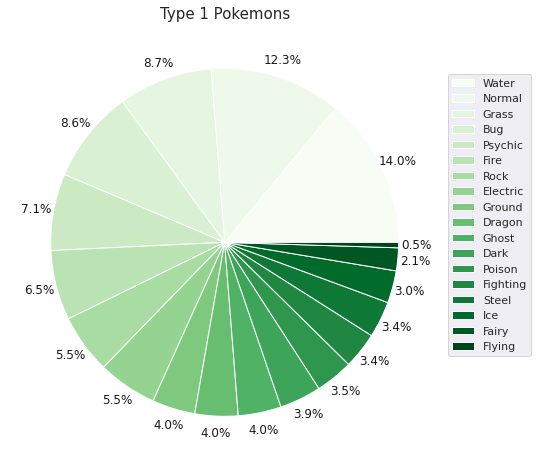

In [ ]:
sns.set(rc = {"figure.figsize":[8,8]})
labels = t1["index"]
col = plt.cm.Greens
colors = col(np.linspace(0., 1., len(labels)))
plt.pie(t1["Type 1"],autopct='%1.1f%%' ,textprops=dict(color="k",),pctdistance=1.1, colors = colors)
plt.title("Type 1 Pokemons",fontdict={"fontsize":15})
plt.legend(bbox_to_anchor=(1,0.9),labels = labels)
plt.show()

As you can see this Pie chart gives us good understanding of data. Water type  Pokemons are the most with 14%(112) followed by Normal type with 12.3%(98) and Flying type has least number of Pokemons(4). We used `autopct='%1.1f%%'` to get Percentage value in pie chart. 

We can also get similar data on Type 2 pokemons.

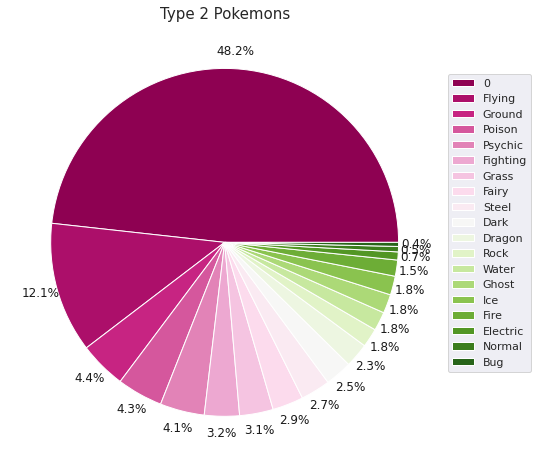

In [ ]:
sns.set(rc = {"figure.figsize":[8,8]})
labels = t2["index"]
col = plt.cm.PiYG
colors = col(np.linspace(0., 1., len(labels)))
plt.pie(t2["Type 2"],autopct='%1.1f%%',textprops=dict(color="k",),pctdistance=1.1, colors = colors)
plt.title("Type 2 Pokemons",fontdict={"fontsize":15})
plt.legend(bbox_to_anchor=(1,0.9),labels = labels)
plt.show()

This shows us that almost half of the pokemons(386) do not have secondary type.

With help of `plt.cm` we get our desired colour scheme. 
Refer to Matplotlib documentation for further reference on [pie chart](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html) and [colour map](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

#### Q2: Which Type of Pokemons have high HP(Hitpoint)?

HP is amount of damage pokemon can take before fainting. For this purpose we will be using Median HP of all Type 1 pokemons. This is because median is better measure of central tendency than mean. Mean of the data is highly affected by [outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) in the data.

In [ ]:
Med_HP = poke_df.groupby("Type 1")['HP'].median().reset_index()

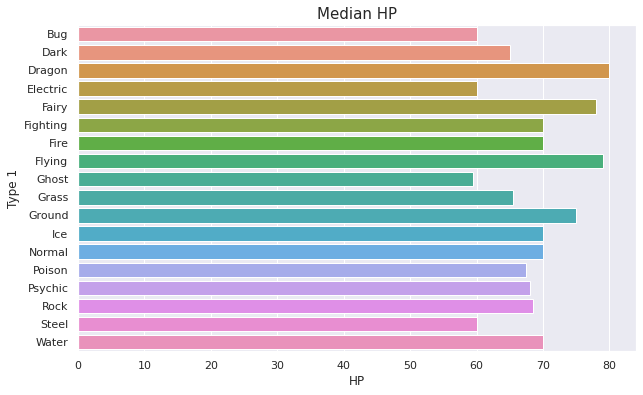

In [ ]:
sns.set(rc = {"figure.figsize":[10,6]})
plt.title("Median HP",fontdict={"fontsize":15})
sns.barplot(x = "HP", y="Type 1",data=Med_HP)
plt.show()

The data shows us that Dragon type pokemon has the highest Hitpoints.

Let us also see the comparison between Mean and Median HP data.

In [ ]:
Mean_HP= poke_df.groupby("Type 1")['HP'].mean().reset_index()

In [ ]:
Mean_med =pd.merge(Mean_HP, Med_HP , on= "Type 1")
Mean_med.rename(columns = {"HP_x":"Mean", "HP_y":"Median"}, inplace =True)

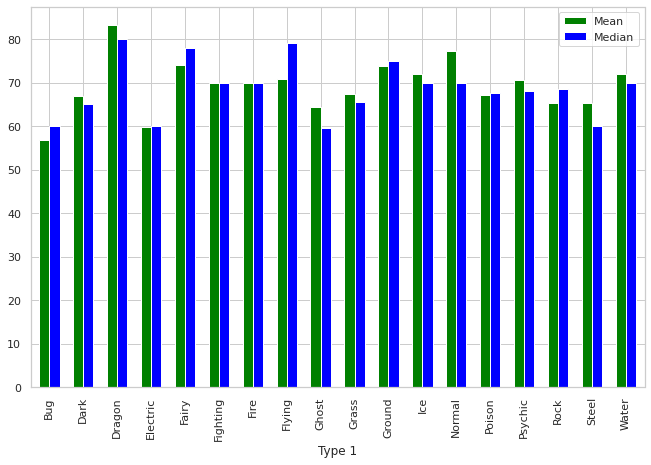

In [ ]:
sns.set(rc = {"figure.figsize":[11,7]})
sns.set_style("whitegrid")
plt.ylabel=("HP")
Mean_med.plot(x ="Type 1", y = ["Mean", "Median"], kind = 'bar', width = 0.6,color =[ "green","blue"])
plt.show()

We can clearly see diffrence between Mean and median. For eg: Normal type pokemon has higher mean than median which explains that Normal type pokemons have higher outliers which affects the mean values but it has litte effect on median. 

#### Q3: How many Legendary pokemons are there in dataset?

In [ ]:
leg_pk = poke_df.loc[(poke_df["Legendary"]==True)]
len(leg_pk)

65

We see that there are 65 Legendary pokemons. Let us look what type they are.

In [ ]:
leg_pk["Type 1"].value_counts()

Psychic     14
Dragon      12
Fire         5
Water        4
Ground       4
Rock         4
Electric     4
Steel        4
Grass        3
Normal       2
Ghost        2
Dark         2
Flying       2
Ice          2
Fairy        1
Name: Type 1, dtype: int64

In [ ]:
leg_pk["Type 2"].value_counts()

0           25
Flying      13
Psychic      5
Dragon       4
Fighting     4
Ice          3
Fire         3
Fairy        2
Ghost        1
Dark         1
Water        1
Ground       1
Electric     1
Steel        1
Name: Type 2, dtype: int64

Data shows that Pyschic Type of Pokemon have highest count(14) in Legendary Pokemons followed by Dragon Type(12). 25 Legendary Pokemons do not have a secondary type.

#### Q4: How are Legendary pokemons different?

Legendary pokemons are group of incredibly rare Pokemons they are very powerful compared to Non Legendary Pokemons.
Let us see how Legendary pokemons' stats are commpared to non-Legendary pokemons.

We will use `plt.subplots` to get multiple graphs together. We will compare HP,Attack,Speed and Defense of Legendary pokemons to non Legendary pokemons.

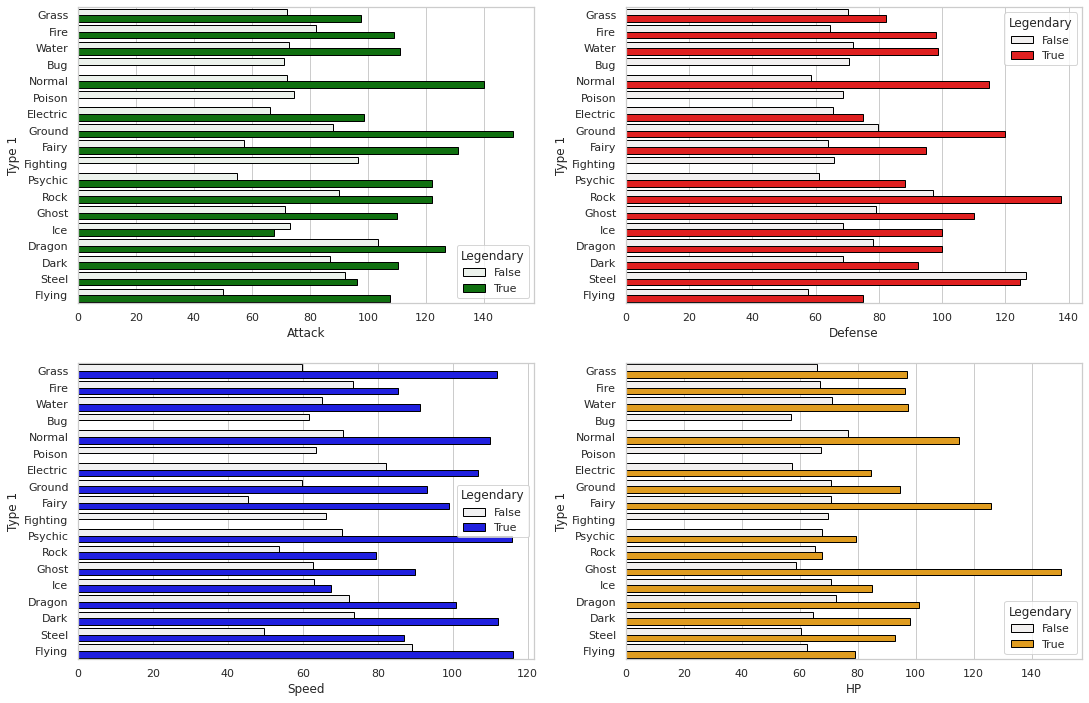

In [ ]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(2,2, figsize = (18,12))
sns.barplot(x= "Attack", y="Type 1", data=poke_df,hue="Legendary",color="green",edgecolor="black",ci=False,ax = axes[0,0])
sns.barplot(x= "Defense", y="Type 1", data=poke_df,hue="Legendary",color="red",edgecolor="black",ci=False,ax = axes[0,1])
sns.barplot(x= "Speed", y="Type 1", data=poke_df,hue="Legendary",color="blue",edgecolor="black",ci=False,ax = axes[1,0])
sns.barplot(x= "HP", y="Type 1", data=poke_df,hue="Legendary",ci=False,color="orange",edgecolor="black",ax = axes[1,1])
plt.show()

Barplot in seaborn is also used to get mean of categorical data,we see that it creates a plot taking a mean per categorical column.

We see that Legendary Pokemons are alot powerful in every aspect proving why they are called Legendary. But an exception is seen that Non-Legendary steel type pokemons have higher defesive stats than Legendary steel type.

#### Q5: What is correlation between Defense and Speed stats?

Correlation in statitics is tool for describing simple relationships, it helps to find out degree to which two variables move in coordination with one-another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.

* [To read more about correlation click here](https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/)

As seen in above data Steel type Pokemons have better defense stats than other pokemons but are also slower. So this raises a question that whether higher defense stats is positively correlated to lower speed stats.

Let's use boxplots to compare Defense and speed of Steel type pokemons and all the pokemons.A Boxplot or box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

In [ ]:
steel = poke_df.loc[poke_df["Type 1"]=='Steel']

In [ ]:
fig,axes = plt.subplots(1,2, figsize = (16,5))
lab=["Overall", "Steel"]
ovr_def = poke_df["Defense"].values
ovr_spd = poke_df["Speed"].values
st_def = steel["Defense"].values
st_spd = steel["Speed"].values
axes[0].boxplot([ovr_def ,st_def], labels=lab, patch_artist=True,vert=False)
axes[0].set_title("Defense Comparision")
axes[1].boxplot([ovr_spd ,st_spd], labels=lab, patch_artist=True,vert=False)
axes[1].set_title("Speed Comparision")

plt.show()

Note that in a box and whisker plot:

* the ends of the box are the upper and lower quartiles, so the box spans the interquartile range
* the median is marked by a vertical line inside the box
* the whiskers are the two lines outside the box that extend to the highest and lowest observations. 

We can clearly see that steel type pokemons have better defense than others but are also slower, coming back to our question we will now see that whether higher defense means lower speed. We will take help of another statistical method called Linear regression.Linear regression is the next step up after correlation. It is used when we want to predict the value of a variable based on the value of another variable.

* [To know more about Linear regression click here](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)

`sns.regplot`will help us here it is used to plot data and a linear regression model fit.

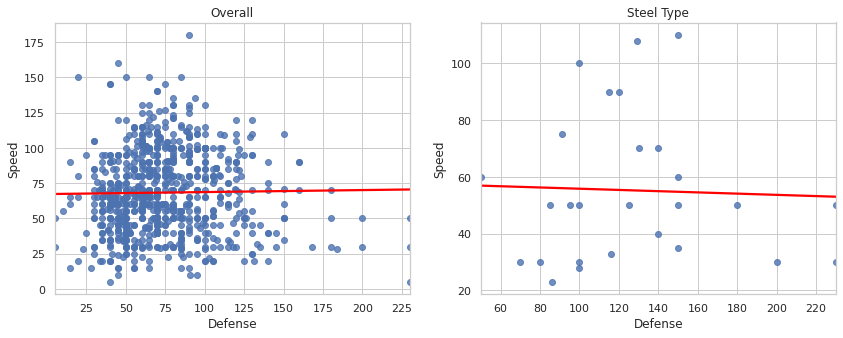

In [ ]:
fig,axes = plt.subplots(1,2, figsize = (14,5))

sns.regplot(x="Defense",y='Speed', data= poke_df,line_kws={"color": "red"},ci=False,ax=axes[0])
axes[0].set_title("Overall")
sns.regplot(x="Defense",y='Speed', data= steel,line_kws={"color": "red"},ci=False,ax=axes[1])
axes[1].set_title("Steel Type")
plt.show()

Regression line is best fit line drawn through scatter plots.
Line in red is regression line, it tells us how responsive both the variables are positively sloped regression line tells us that there is positive correlation and negatively sloped line indicates negative correlation. But when line is flat then there is no ability to predict whatsoever.

We can infer than in Overall data which contains all Type of Pokemons the slope of regression line is positive but is relatively flatter. But in Steel type pokemons we see that as defense increases speed decreases which is indicated by negatively sloped regression line but is also relatively flatter.

In the second case we can deduce that as Steel pokemons with higher defensive stats have more armour around their bodies which adds to their weight and takes toll on their mobility hence the lower speed.

Refer to [sns.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) for further reference on regression plots.

#### Q6: Which Generation has highest Total score?

A generation is a grouping of the Pokémon games that separates them based on the Pokémon they include. In each generation, a new set of Pokémon, region, moves, and abilities that did not exist in the previous generation are released.

In [ ]:
gen_data= poke_df.groupby("Generation")["Total"].mean().reset_index()
gen_data

Generation       Total
0           1  426.813253
1           2  418.283019
2           3  436.225000
3           4  459.016529
4           5  434.987879
5           6  436.378049

We can get visual representation through barplots.

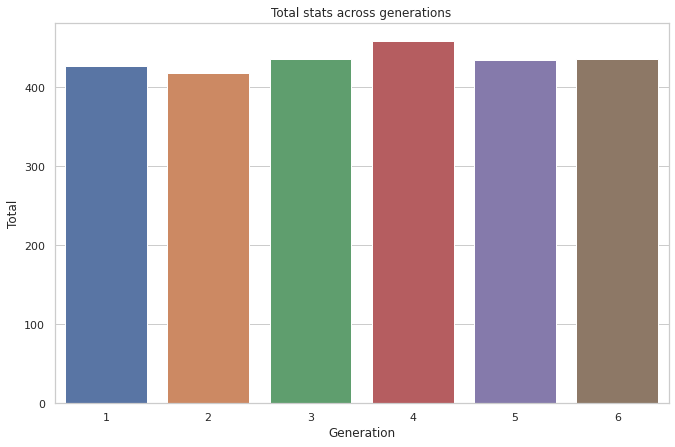

In [ ]:
plt.title("Total stats across generations")
sns.barplot(x="Generation", y="Total",data=gen_data)
plt.show()

We now know that Generation 4 has highest Total stats followed by Generation 6 and Generation 2 has lowest Total stats.

Let us save and upload our work to Jovian before continuing.

#### We can visualize `groupby` method shown in Explanatory Analysis and Visualization section.

In [ ]:
#Let us revisit the data
mean = poke_df.groupby("Type 1").mean().reset_index()
mean

Type 1  Pokedex_no.         HP      Attack     Defense    Sp. Atk  \
0        Bug   334.492754  56.884058   70.971014   70.724638  53.869565   
1       Dark   461.354839  66.806452   88.387097   70.225806  74.645161   
2     Dragon   474.375000  83.312500  112.125000   86.375000  96.843750   
3   Electric   363.500000  59.795455   69.090909   66.295455  90.022727   
4      Fairy   449.529412  74.117647   61.529412   65.705882  78.529412   
5   Fighting   363.851852  69.851852   96.777778   65.925926  53.111111   
6       Fire   327.403846  69.903846   84.769231   67.769231  88.980769   
7     Flying   677.750000  70.750000   78.750000   66.250000  94.250000   
8      Ghost   486.500000  64.437500   73.781250   81.187500  79.343750   
9      Grass   344.871429  67.271429   73.214286   70.800000  77.500000   
10    Ground   356.281250  73.781250   95.750000   84.843750  56.468750   
11       Ice   423.541667  72.000000   72.750000   71.416667  77.541667   
12    Normal   319.173469  77.275510   73.469388   59.846939  55.816327   
13    Poison   251.785714  67.250000   74.678571   68.821429  60.428571   
14   Psychic   380.807018  70.631579   71.456140   67.684211  98.403509   
15      Rock   392.727273  65.363636   92.863636  100.795455  63.340909   
16     Steel   442.851852  65.222222   92.703704  126.370370  67.518519   
17     Water   303.089286  72.062500   74.151786   72.946429  74.812500   

      Sp. Def       Speed       Total  Generation  Legendary  
0   64.797101   61.681159  378.927536    3.217391   0.000000  
1   69.516129   76.161290  445.741935    4.032258   0.064516  
2   88.843750   83.031250  550.531250    3.875000   0.375000  
3   73.704545   84.500000  443.409091    3.272727   0.090909  
4   84.705882   48.588235  413.176471    4.117647   0.058824  
5   64.703704   66.074074  416.444444    3.370370   0.000000  
6   72.211538   74.442308  458.076923    3.211538   0.096154  
7   72.500000  102.500000  485.000000    5.500000   0.500000  
8   76.468750   64.343750  439.562500    4.187500   0.062500  
9   70.428571   61.928571  421.142857    3.357143   0.042857  
10  62.750000   63.906250  437.500000    3.156250   0.125000  
11  76.291667   63.458333  433.458333    3.541667   0.083333  
12  63.724490   71.551020  401.683673    3.051020   0.020408  
13  64.392857   63.571429  399.142857    2.535714   0.000000  
14  86.280702   81.491228  475.947368    3.385965   0.245614  
15  75.477273   55.909091  453.750000    3.454545   0.090909  
16  80.629630   55.259259  487.703704    3.851852   0.148148  
17  70.517857   65.964286  430.455357    2.857143   0.035714

We are using `groupby().mean()` data. 

In [ ]:
sns.set_style("white")
y=sns.PairGrid(mean.sort_values("Total",ascending=False),        #<- This arranges Pokemon Type in descending order of Total Stats 
                 x_vars=poke_df.columns[4:10], y_vars=["Type 1"],
                 height=10, aspect=.25)

y.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=0.7, edgecolor="w")

titles=['HP','Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']

for ax, title in zip(y.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Here we only keep y axis grid
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

We got beautiful visualization of our `groupby` data, which looks like a scale for analysing all Pokemon types.
For additional info on this type of grid go to seaborn [Pairgrid documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) and Seaborn gallery.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anurag-commando-dude/pokemon-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/anurag-commando-dude/pokemon-data-analysis


'https://jovian.ai/anurag-commando-dude/pokemon-data-analysis'

## Inferences and Conclusion

We got an intresting insight on Pokemon world and how their powers compared to each other. Use of statistical analysis helped us to know correlation between their powers, we got to know that there water type pokemons constitutes to 14% of all pokemons and we came to know which type has most Legendary pokemons. We also compared Total stats of all Generations showing 4th Generarion is strongest. At the end we saw additional visualization which tells us alot about data without looking at whole dataframe.

## References and Future Work

There is much more that can be done with this data. Here are some ideas which can be explored:
* Regression analysis on Attack and Speed, HP and Defense, Special Attack and Special defense etc
* Which Generation has most number of Legendary pokemons. 
* Like our last visualization make another PairGrid considering `groupby().median()`.

Reference:
* [Pokemon Data analysis By Sharvil Bhurke](https://jovian.ai/sharvilbhurke/pokemon-data-course-project)
* [Numpy Documentation](https://numpy.org/devdocs/docs/howto_document.html)
* [Matplotlib Documentation](https://matplotlib.org/)
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Seaborn Documentation](https://seaborn.pydata.org/)
* [geekforgeeks](https://www.geeksforgeeks.org/data-analysis-visualization-python/#:~:text=Importing%20Data%20with%20Pandas,file%20into%20a%20Pandas%20DataFrame.)
* For diffrent type of visualizations visit [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html).

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [ ]:
jovian.submit(assignment="zero-to-pandas-project")